In [97]:
import math
import string
import numpy as np
import itertools

import pandas as pd
from matplotlib import pyplot as plt

In [98]:
# Dutch version: https://www.dbnl.org/tekst/carr021avon02_01/carr021avon02_01.pdf
# "a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z"
COMMON_LETTERS = "abcdefghijklmnopqrstuvwxyz"
COMMON_LETTERS

'abcdefghijklmnopqrstuvwxyz'

In [99]:
# Count (assigment for the quizzes)

# open the input file, which was added as input.txt in the menu on the left.
f = open("Jack.txt")

# read the text in the file (it is stored as a long string), and convert it to lowercase in the process
data = f.read().lower()

# your code here (scroll down for hints)
dict = {}

for letter in "abcdefghijklmnopqrstuvwxyz":
    dict[letter] = 0

# loop through all characters in the file:
for c in data:
    # your code here (scroll down for hints)
    if c in dict.keys():
        dict[c] += 1

freq = max(dict.values())
most_freq = [letter for letter, count in dict.items() if count == freq]
print(most_freq, freq)
print(dict)

FileNotFoundError: [Errno 2] No such file or directory: 'Jack.txt'

# Part 4a

In [100]:
langs = ("eng", "esp", "fin", "ger", "ita", "dutch")

dict = {}

for lang in langs:

    # Open input file
    with open(f"HW1/Alice_{lang}.txt") as file:
        # Read the text in the file, and convert it to lowercase in the process
        data = file.read().lower()

    # Create subdictionary for the languages
    dict[f"{lang}"] = {}

    # create keys
    for letter in "abcdefghijklmnopqrstuvwxyz":
        dict[f"{lang}"][letter] = 0

    # Amount of letters
    amount_letters = 0

    # Loop through all characters in the file
    for c in data:
        # If c is a letter, one is added to its count
        if c in dict[f"{lang}"].keys():
            amount_letters += 1
            dict[f"{lang}"][c] += 1

    for letter in "abcdefghijklmnopqrstuvwxyz":
        dict[f"{lang}"][letter] /= amount_letters

<AxesSubplot:title={'center':'Frequency Distribution of Letters'}>

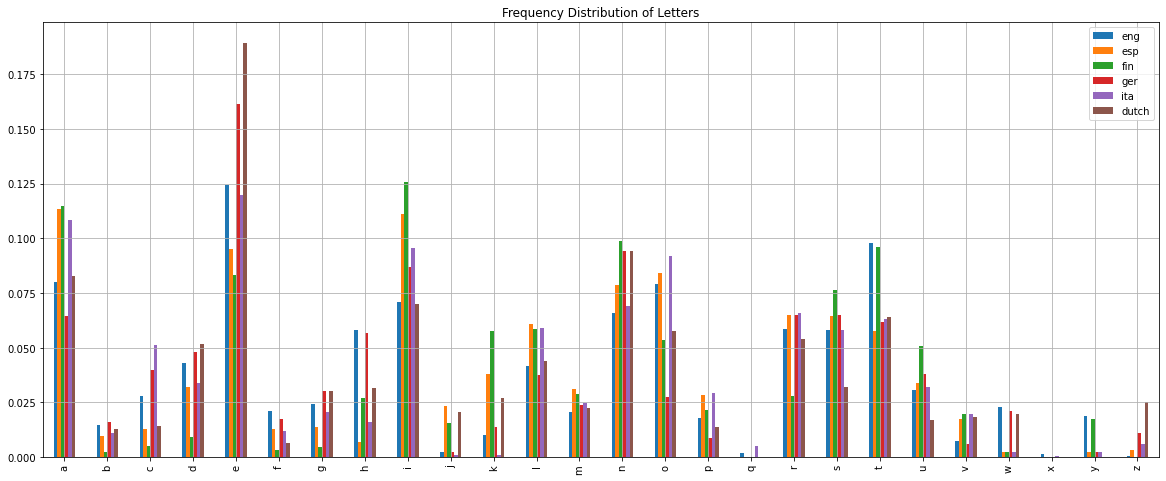

In [101]:
lang_df = pd.DataFrame(dict)
lang_df.plot(kind='bar', figsize=(20,8), grid=True, title="Frequency Distribution of Letters")

In [102]:
# Compute the total variance distance for each combination of two languages
# tot_var_dist = {}
tot_var_dist = []

for lang_1, lang_2 in itertools.combinations(langs, 2):
    # tot_var_dist[(lang_1, lang_2)] = 0
    _no_letters = 0
    for letter in "abcdefghijklmnopqrstuvwxyz":
        _no_letters += np.abs(dict[lang_1][letter] - dict[lang_2][letter])
    tot_var_dist.append([lang_1, lang_2, _no_letters * .5])

""" Sanity check with the same language """
# _no_letters = 0
# for letter in "abcdefghijklmnopqrstuvwxyz":
#     _no_letters += np.abs(dict['eng'][letter] - dict['eng'][letter])
# tot_var_dist.append(['eng', 'eng', _no_letters * .5])

    # for letter in "abcdefghijklmnopqrstuvwxyz":
    #     tot_var_dist[(lang_1, lang_2)] += np.abs(dict[lang_1][letter] - dict[lang_2][letter])
    # tot_var_dist[(lang_1, lang_2)] *= 0.5

' Sanity check with the same language '

In [103]:
# pd.DataFrame(tot_var_dist)
lc_df = pd.DataFrame(tot_var_dist, columns=['lang_1', 'lang_2', "Variational_Distance"])
lc_df.set_index(['lang_1', 'lang_2'], inplace=True)
lc_df.sort_values("Variational_Distance", ascending=True, inplace=True)
lc_df

,,Variational_Distance
lang_1,lang_2,
esp,ita,0.106021
eng,ger,0.143767
ger,dutch,0.152218
eng,ita,0.155145
esp,fin,0.159583
eng,dutch,0.185384
ger,ita,0.191902
eng,esp,0.209377
esp,dutch,0.221453


<AxesSubplot:title={'center':'Variational Distance Between Different Languages'}, xlabel='lang_1,lang_2', ylabel='Variational Distance'>

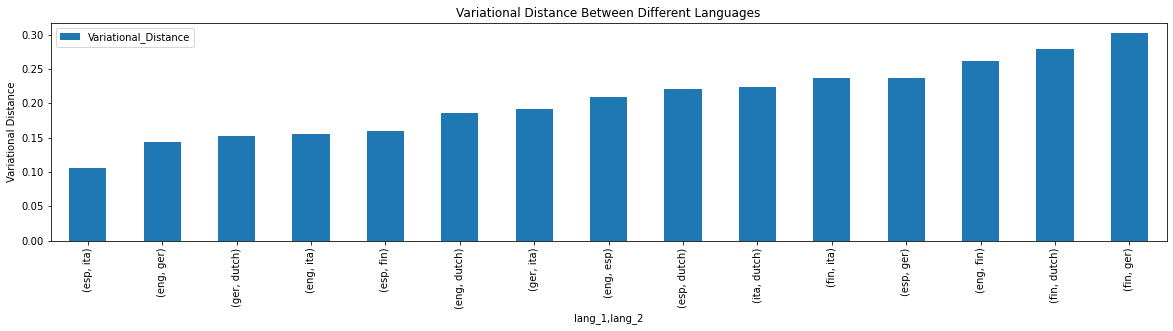

In [104]:
lc_df.plot(kind="bar", figsize=(20,4), ylabel='Variational Distance', title='Variational Distance Between Different Languages')

In [105]:
# Find furthest apart
# max_tot_var_dist = max(tot_var_dist.values())
# max_tot_var_dist = max(tot_var_dist)

# max_dist_langs = [langs for langs, var in tot_var_dist.items() if var == max_tot_var_dist]
# print("The two languages that are furthest apart are:", max_dist_langs[0],
#       "with a total variance distance of", max_tot_var_dist)
print("The two languages that are furthest apart are:", lc_df[lc_df.Variational_Distance == lc_df.Variational_Distance.max()].index.values[0],
      "with a total variance distance of", lc_df[lc_df.Variational_Distance == lc_df.Variational_Distance.max()].Variational_Distance.values[0])

# Find closest together
# min_tot_var_dist = min(tot_var_dist.values())
# min_dist_langs = [langs for langs, var in tot_var_dist.items() if var == min_tot_var_dist]
# print("The two languages that are closest are:", min_dist_langs[0],
#       "with a total variance distance of", min_tot_var_dist)
print("The two languages that are closest are:", lc_df[lc_df.Variational_Distance == lc_df.Variational_Distance.min()].index.values[0],
      "with a total variance distance of", lc_df[lc_df.Variational_Distance == lc_df.Variational_Distance.min()].Variational_Distance.values[0])

The two languages that are furthest apart are: ('fin', 'ger') with a total variance distance of 0.3019905450860071
The two languages that are closest are: ('esp', 'ita') with a total variance distance of 0.10602051098152043


# Part 4b

In [119]:
col_prob = {}
#tot_prob = {}

for lang in langs:
    col_prob[lang] = 0
    #tot_prob[lang] = 0

    for letter in "abcdefghijklmnopqrstuvwxyz":
        #tot_prob[lang] += dict[f"{lang}"][letter]
        col_prob[lang] += dict[f"{lang}"][letter] ** 2

col_prob_df = pd.DataFrame(col_prob.values(), columns=['Collision_P'], index=col_prob.keys())
col_prob_df.sort_values('Collision_P', inplace=True)
print(col_prob_df.to_latex(index=True))
# col_prob

\begin{tabular}{lr}
\toprule
{} &  Collision\_P \\
\midrule
eng   &     0.065547 \\
esp   &     0.069942 \\
ita   &     0.071288 \\
ger   &     0.072491 \\
fin   &     0.076749 \\
dutch &     0.078209 \\
\bottomrule
\end{tabular}



# Part 4d - Open cipher

In [107]:
file = open("HW1/permuted_cipher.txt")

# Read the text in the file, and convert it to lowercase in the process
data = file.read().lower()

# Create dictionary
cipher_dict = {}

# create keys
for letter in "abcdefghijklmnopqrstuvwxyz":
    cipher_dict[letter] = 0

# Amount of letters
amount_letters = 0

# Loop through all characters in the file
for c in data:
    # If c is a letter, one is added to its count
    if c in dict[f"{lang}"].keys():
        amount_letters += 1
        cipher_dict[c] += 1

for letter in "abcdefghijklmnopqrstuvwxyz":
    cipher_dict[letter] /= amount_letters

# Compute the total variance distance for each combination of two languages
tot_var_dist_cipher = {}

for lang in langs:
    tot_var_dist_cipher[lang] = 0

    for letter in "abcdefghijklmnopqrstuvwxyz":
        tot_var_dist_cipher[lang] += np.abs(cipher_dict[letter] - dict[lang][letter])

    tot_var_dist_cipher[lang] *= 0.5

# Find furthest apart
min_tot_var_dist_cipher = min(tot_var_dist_cipher.values())
min_dist_langs_cipher = [langs for langs, var in tot_var_dist_cipher.items() if var == min_tot_var_dist_cipher]
print("The total variance distance is minimized with:", min_dist_langs_cipher,
      "with a total variance distance of", min_tot_var_dist_cipher)

The total variance distance is minimized with: ['esp'] with a total variance distance of 0.03982758841882112


In [129]:
print(pd.DataFrame.from_dict(tot_var_dist_cipher.items()).set_index(0).sort_values(1).to_latex()) # , columns=['Lang', 'Var_Distance']d

\begin{tabular}{lr}
\toprule
{} &         1 \\
0     &           \\
\midrule
esp   &  0.039828 \\
ita   &  0.098583 \\
fin   &  0.177158 \\
eng   &  0.211703 \\
dutch &  0.217179 \\
ger   &  0.243311 \\
\bottomrule
\end{tabular}



# Part 4e - Collision probability

In [130]:
col_prob_cipher = 0

for letter in "abcdefghijklmnopqrstuvwxyz":
    col_prob_cipher += cipher_dict[letter] ** 2

print(col_prob_cipher)

diff = {}
for lang in langs:
    diff[lang] = np.abs(col_prob[lang] - col_prob_cipher)

diff_closest_lang_col_prob = min(diff.values())
closest_lang_col_prob = [langs for langs, var in diff.items() if var == diff_closest_lang_col_prob]
print(closest_lang_col_prob)

0.07008295280317044
['esp']


In [137]:
diff_df = pd.DataFrame(diff.values(), index=diff.keys()).sort_values(0)
print(diff_df.to_latex())

\begin{tabular}{lr}
\toprule
{} &         0 \\
\midrule
esp   &  0.000141 \\
ita   &  0.001205 \\
ger   &  0.002408 \\
eng   &  0.004536 \\
fin   &  0.006666 \\
dutch &  0.008126 \\
\bottomrule
\end{tabular}

